# Miami Plot

In this notebook we intend to show how can be used the library `IDEAL-GENOM` to generate a Miami Plot. 

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from ideal_genom.visualization.manhattan_type import miami_draw
from ideal_genom.get_examples import get_bmi_japanese_gwas, get_bmi_japanese_gwas_sex_dependent

ImportError: cannot import name 'get_bmi_japanese_gwas' from 'ideal_genom.get_examples' (/home/luis/CGE/ideal-genom/ideal_genom/get_examples.py)

The data is taken from the article

Akiyama, M., Okada, Y., Kanai, M. et al. Genome-wide association study identifies 112 new loci for body mass index in the Japanese population. *Nat Genet* **49**, 1458–1467 (2017). https://doi.org/10.1038/ng.3951

To draw this plot, we use summary statistics generated for males and females. 

In [ ]:
gwas_f, gwas_m = get_bmi_japanese_gwas()

2025-06-24 10:25:21,909 - INFO - Files /home/luis/CGE/ideal-genom/data/sumstats/Female_2017_BMI_BBJ_autosome.txt and /home/luis/CGE/ideal-genom/data/sumstats/Male_2017_BMI_BBJ_autosome.txt already exist


In [ ]:
df_F = pd.read_csv(gwas_f, sep='\t')
df_M = pd.read_csv(gwas_m, sep='\t')

Please, provide the columns to load from the **GWAS** summary statistics. The essential columns are those that contains chromosome, base-pair position, rsID and p-value. It is important to remark that columns names most coincide in both files, at least for the four columns that will be used to generate the Miami plot.

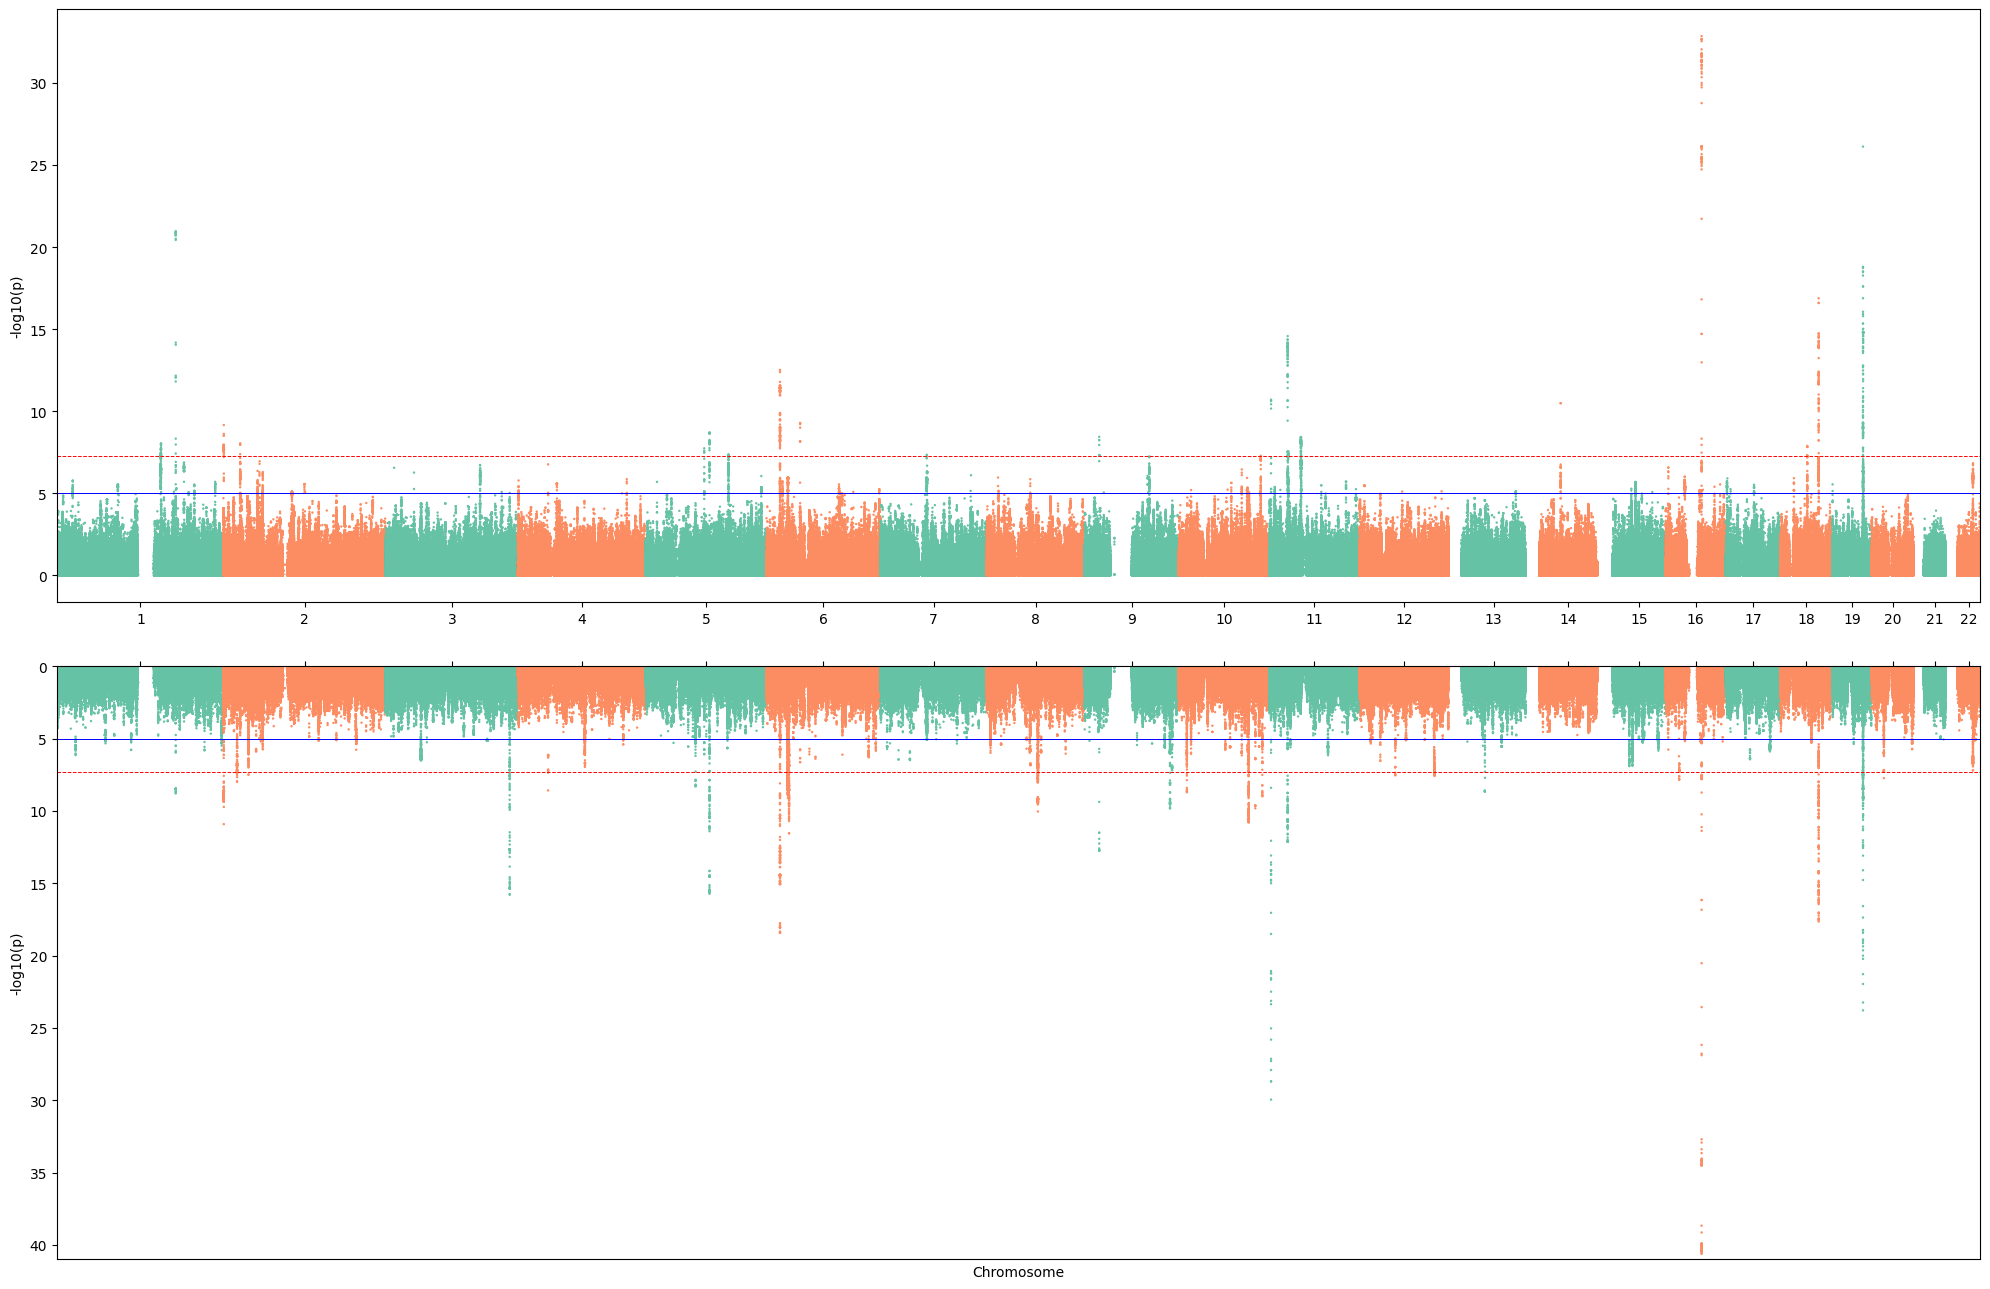

True

In [ ]:
miami_draw(
    df_top            =df_F,
    df_bottom         =df_M,
    snp_col           ='SNP',
    chr_col           ='CHR',
    pos_col           ='POS',
    p_col             ='P',
    plots_dir         =gwas_f.parent.as_posix(), 
    save_name         ='miami_plot_female_vs_male.png',
)

In the reference study there is no a separated list of top hits for males and females, so let us make a fake list of the SNPs with lowest $p$-values.

In [ ]:
df_top_hlite = df_F[df_F['P'] < 5e-16]['SNP'].to_list()
df_bottom_hlite = df_M[df_M['P'] < 5e-16]['SNP'].to_list()

In [ ]:
miami_draw(
    df_top            =df_F,
    df_bottom         =df_M,
    snp_col           ='SNP',
    chr_col           ='CHR',
    pos_col           ='POS',
    p_col             ='P',
    plots_dir         =gwas_f.parent.as_posix(),
    top_highlights    =df_top_hlite,
    bottom_highlights=df_bottom_hlite,
    legend_top        ='Female GWAS',
    legend_bottom     ='Male GWAS',
    save_name         ='miami_plot_female_vs_male_hlite.png',
)

NameError: name 'miami_draw' is not defined

In [ ]:
anno_path = get_bmi_japanese_gwas_sex_dependent()

df_anno = pd.read_csv(anno_path, sep='\t')

2025-06-24 10:32:05,997 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/sumstats/2017_BBJ_bmi_supplementary.csv


2025-06-24 10:32:59,121 - INFO - Starting to annotate variants with nearest gene name(s)...
2025-06-24 10:32:59,121 - INFO -  -Using 37 as genome build
2025-06-24 10:32:59,122 - INFO - is_gtf_path set to False
2025-06-24 10:32:59,122 - INFO -  -Using ensembl as source for gene annotation
2025-06-24 10:32:59,122 - INFO -  -Assigning Gene name using Ensembl GRCh37 for protein coding genes
2025-06-24 10:32:59,122 - INFO -  -Downloading Ensembl GRCh37 GTF file
2025-06-24 10:32:59,432 - INFO - Latest GTF file: Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:32:59,432 - INFO - Download URL: https://ftp.ensembl.org/pub/grch37/release-114/gtf/homo_sapiens/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:32:59,433 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf.gz
2025-06-24 10:32:59,433 - INFO - File already exists: /home/luis/CGE/ideal-genom/data/ensembl_latest/Homo_sapiens.GRCh37.87.chr.gtf
2025-06-24 10:32:59,434 - INFO - File alrea

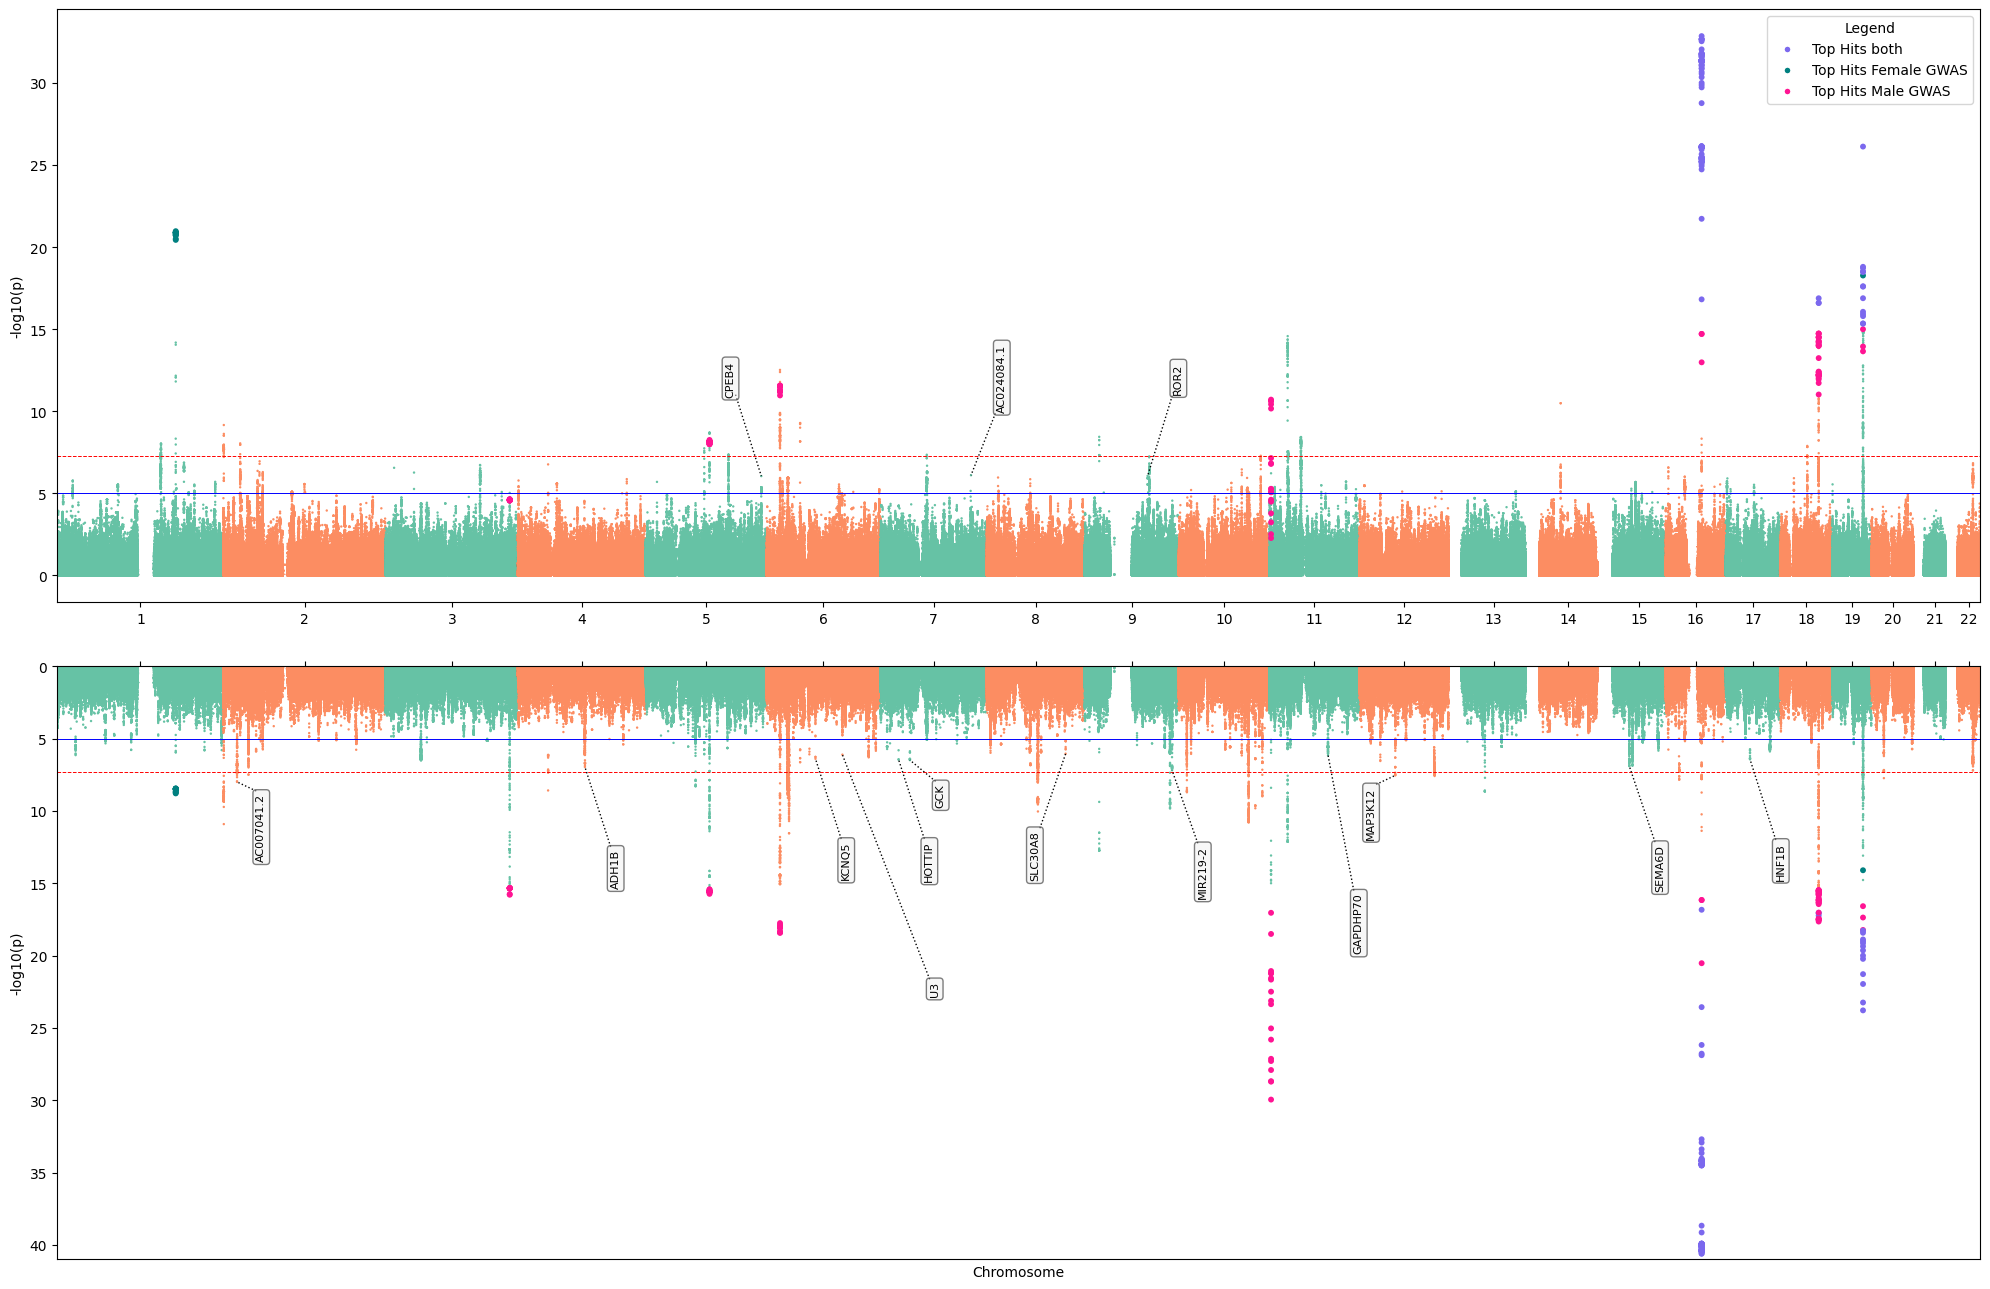

True

In [ ]:
miami_draw(
    df_top            =df_F,
    df_bottom         =df_M,
    snp_col           ='SNP',
    chr_col           ='CHR',
    pos_col           ='POS',
    p_col             ='P',
    plots_dir         =gwas_f.parent.as_posix(),
    top_highlights    =df_top_hlite,
    top_annotations   = df_anno[df_anno['Sex']=='Female'][['SNP']].reset_index(drop=True),
    bottom_highlights =df_bottom_hlite,
    bottom_annotations= df_anno[df_anno['Sex']=='Male'][['SNP']].reset_index(drop=True),
    legend_top        ='Female GWAS',
    legend_bottom     ='Male GWAS',
    save_name         ='miami_plot_female_vs_male_anno.png',
    source='ensembl',
    build='37'
)